<a href="https://colab.research.google.com/github/akhil189/Deep-Learning-in-Tensorflow-2.0/blob/master/CNNs/Image%20Classification/Multi%20Class%20Image%20Classification/Muilti_class_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',  force_remount=True)

Mounted at /content/gdrive


In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from PIL import Image
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt
import pathlib
import os
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [0]:
tf.__version__

'2.0.0'

In [0]:
data_dir  = '/content/gdrive/My Drive/Tensorflow/DL_Assigns/1/A1-Q2_Dataset/Q2Data/SplitData'


train_dir = os.path.join(data_dir,'Train')
val_dir = os.path.join(data_dir,'Val')
test_dir = os.path.join(data_dir,'Test')

In [7]:
total_count = len(list(pathlib.Path(data_dir).glob('*/*/*.jpg')))
train_count = len(list(pathlib.Path(train_dir).glob('*/*.jpg')))
val_count = len(list(pathlib.Path(val_dir).glob('*/*.jpg')))
test_count = len(list(pathlib.Path(test_dir).glob('*/*.jpg')))
print('Train Images:{}, Validation Images:{}, Test Images:{}'.format(train_count, val_count, test_count))
print('Total Images: {}'.format(total_count))

Train Images:635, Validation Images:136, Test Images:140
Total Images: 911


In [0]:
CLASS_NAMES = np.array(['1','2','3','4','5','6','7'])

In [9]:
list(CLASS_NAMES)

['1', '2', '3', '4', '5', '6', '7']

In [0]:
class_1 = list(pathlib.Path(data_dir).glob('1/*'))

for image in class_1[:3] :
  display.display(Image.open(str(image)))

## Using Keras's Image Data Generater


In [0]:
BATCH_SIZE = 128
IMG_HEIGHT = 150
IMG_WIDTH  = 150
STEPS_PER_EPOCH = np.ceil(train_count/BATCH_SIZE)

In [0]:
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [13]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 635 images belonging to 7 classes.


In [0]:
# train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_image_generator   = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [15]:
val_data_gen = val_image_generator.flow_from_directory(
                   directory = val_dir,
                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                   color_mode='rgb',
                   batch_size= BATCH_SIZE,
                   class_mode='categorical',
                   shuffle=True
                   )

Found 136 images belonging to 7 classes.


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

Augmentation to overcome over-fitting


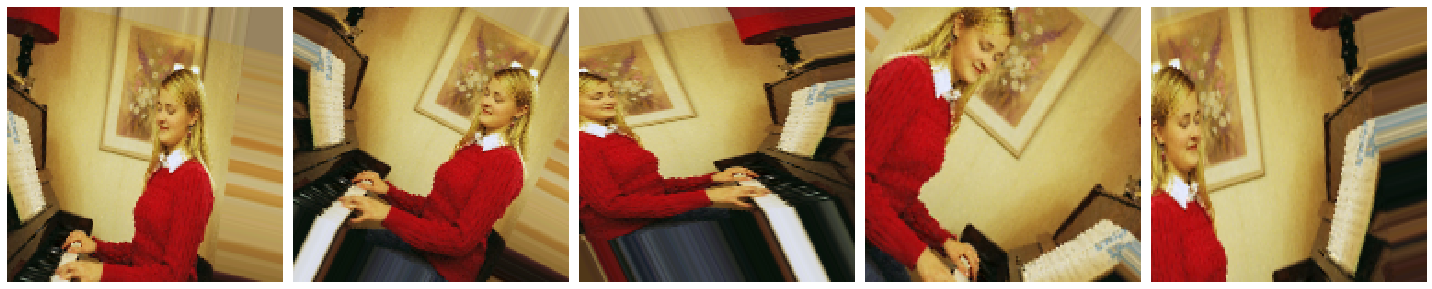

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_batch, label_batch = next(train_data_gen)
# show_batch(image_batch, label_batch)

In [20]:
label_batch

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [21]:
len(label_batch)

128

In [0]:
model = tf.keras.Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
])


In [0]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [0]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=1)

In [26]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= STEPS_PER_EPOCH,
    epochs=20,
    #callbacks=[earlystop_callback],
    validation_data  = val_data_gen,
    validation_steps = np.ceil(val_count/BATCH_SIZE)
)

Epoch 1/20
5/5 [==============================] - 77s 15s/step - loss: 2.4471 - accuracy: 0.1559 - val_loss: 1.8998 - val_accuracy: 0.1544
Epoch 2/20
5/5 [==============================] - 22s 4s/step - loss: 1.9408 - accuracy: 0.1717 - val_loss: 1.9354 - val_accuracy: 0.1912
Epoch 3/20
5/5 [==============================] - 25s 5s/step - loss: 1.8963 - accuracy: 0.1890 - val_loss: 1.9279 - val_accuracy: 0.1912
Epoch 4/20
5/5 [==============================] - 24s 5s/step - loss: 1.8818 - accuracy: 0.1906 - val_loss: 1.8574 - val_accuracy: 0.1838
Epoch 5/20
5/5 [==============================] - 24s 5s/step - loss: 1.8555 - accuracy: 0.2299 - val_loss: 1.9164 - val_accuracy: 0.2353
Epoch 6/20
5/5 [==============================] - 25s 5s/step - loss: 1.8344 - accuracy: 0.2457 - val_loss: 1.9513 - val_accuracy: 0.2574
Epoch 7/20
5/5 [==============================] - 25s 5s/step - loss: 1.8172 - accuracy: 0.2709 - val_loss: 1.6926 - val_accuracy: 0.3015
Epoch 8/20
5/5 [=================

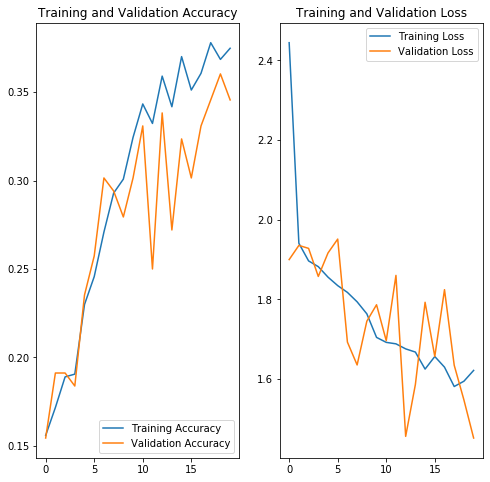

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
print('Final Loss:{} Final Accuracy:{}'.format(acc[-1],loss[-1]))

Final Loss:0.3748031556606293 Final Accuracy:1.621451362662428
